### 일원 분산분석 - ANOVA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### 1. 세 반의 성적 데이터가 있다. 서로 의미있는 차이가 있는지 검정하여라.

1.1. SciPy를 사용해서 ANOVA를 실행해 본다.

In [2]:
y1 = np.array([82,93,61,74,69,70,53,62])
y2 = np.array([71,62,85,94,78,66,71])
y3 = np.array([64,73,87,91,56,78,87,98,77])

In [3]:
stat, p_val = st.f_oneway(y1,y2,y3)
print("검정통계량  : %f " % stat )
print("p-value   : %f " % p_val )

검정통계량  : 0.974502 
p-value   : 0.393806 


1.2. StatsModels를 사용해서 ANOVA를 실행해 본다.

In [4]:
y = np.concatenate([y1,y2,y3])
labels = np.repeat(['A','B','C'],[y1.size,y2.size,y3.size])
my_data = pd.DataFrame({'Treat':labels, 'Y':y})
my_data

,Treat,Y
0,A,82
1,A,93
2,A,61
3,A,74
4,A,69
5,A,70
6,A,53
7,A,62
8,B,71
9,B,62


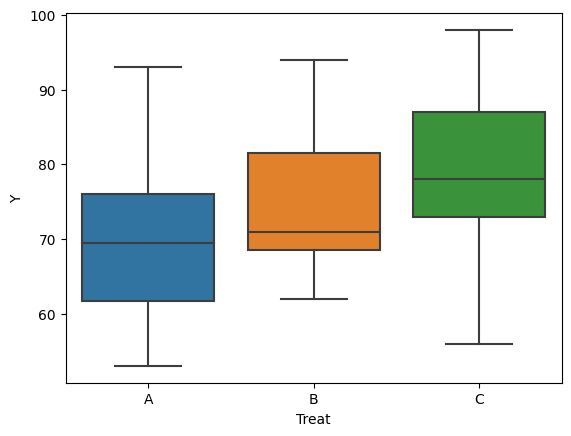

In [5]:
# 다중 상자그림 출력. Seaborn.
sns.boxplot(x="Treat", y="Y", data=my_data)
plt.show()

In [6]:
my_model = smf.ols('Y ~ Treat', data = my_data)     # R 의 문법으로 수식을 만든다.
my_model = my_model.fit()
sm.stats.anova_lm(my_model)

,df,sum_sq,mean_sq,F,PR(>F)
Treat,2.0,306.404762,153.202381,0.974502,0.393806
Residual,21.0,3301.428571,157.210884,NaN,NaN


In [8]:
153.202381/157.210884

0.9745023824177467